# Adaptive Control

In [118]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
T_STEP = 0.01
SIM_TIME = 6
VAR = 10

## Open Loop System

First order system:

$ \dot{x}  = \theta x + u$

where $\theta$ is a constant unkown parameter

In [120]:
class System():

    def __init__(self, theta, x=0, dx=0, t_step=T_STEP):
        self.x_init = x
        self.x = x
        self.dx = dx
        self.theta = theta
        self.t_step = t_step
    
    def __call__(self, u):
        self.dx = self.theta*self.x + u
        self.x += self.dx*self.t_step
        return self.x
    
    def reset(self):
        self.x = self.x_init

In [121]:
sys = System(2, x=np.random.randn()*VAR)
print(f'Initial state value = {sys.x}')

Initial state value = 14.578224641455414


In [122]:
t = []
x = []

for i in range(int(SIM_TIME/T_STEP)):
    t.append(T_STEP*i)
    x.append(sys(0))

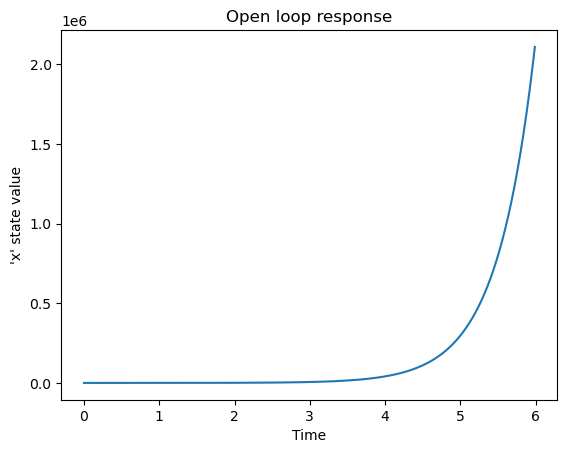

In [123]:
plt.plot(t, x)
plt.title("Open loop response")
plt.xlabel("Time")
plt.ylabel("'x' state value")
plt.show()

System is not stable (when $\theta$ is positive)

## Adaptive Controller

### Theory

Objective is to make $x$ track $x_r$

Error dynamics:
<center>

$e = x - x_r$

$\dot{e} = \dot{x} - \dot{x_r}$\
$\dot{e} = \theta x + u - \dot{x_r}$

</center>

Using the control law:
<center>

$u = \dot{x_r} -ke - \hat{\theta}x$

</center>

Where $\hat{\theta}$ is an estimate for $\theta$

Gives closed loop error dynamics as:
<center>

$\dot{e} = -ke + (\theta - \hat{\theta})x $

</center>

Define estimation error as:
<center>

$\phi = \theta - \hat{\theta}$

</center>
Considering Dynamics, we have new state variables
<center>

$\dot{\phi} = -\dot{\hat{\theta}}$

$\dot{e} = \phi (e+x_r) -ke$

</center>

Consider Lyapunov function:
<center>

$ V = \frac{e^2}{2} + \frac{\phi^2}{2} $

$ \dot{V} = e \dot{e} + \phi \dot{\phi} $\
$ \dot{V} = e (\phi (e+x_r) -ke) + \phi (-\dot{\hat{\theta}}) $\
$ \dot{V} = -k e^2 +  \phi [e (e+x_r) -\dot{\hat{\theta}} ]$

</center>

Set the update law as:
<center>

$ \dot{\hat{\theta}} = e(e+x_r) = ex$

</center>

Then,
<center>

$ \dot{V} = -ke^2$

</center>

### Implementation

#### For non-zero constant $x_r$ trajectory

In [124]:
sys.reset()

# Reference Value
x_r = 7

# Pole placement control law constant
k = 3

t = [0]
x = [sys.x]
e = [sys.x - x_r]
u = [0]

theta_hat = [0]
d_theta_hat = 0

for i in range(1, int(SIM_TIME/T_STEP)):
    t.append(T_STEP*i)
    u.append(-k*e[i-1] - theta_hat[i-1]*x[i-1])

    x.append(sys(u[i]))
    e.append(x[i] - x_r)
    
    d_theta_hat = e[i]*x[i]
    theta_hat.append(d_theta_hat*T_STEP + theta_hat[i-1])

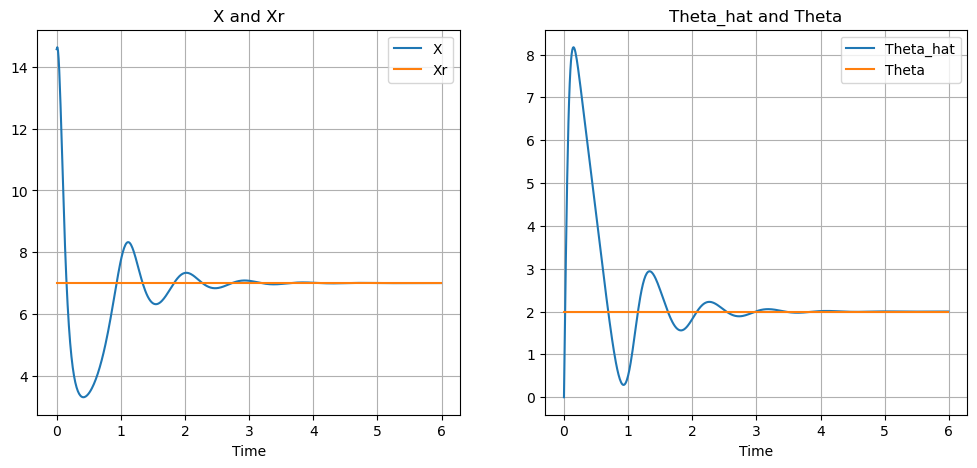

In [125]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(t,x)
plt.plot(t, [x_r]*len(t))
plt.title("X and Xr")
plt.xlabel("Time")
plt.legend(["X","Xr"])
plt.grid()

plt.subplot(1,2,2)
plt.plot(t,theta_hat)
plt.plot(t, [sys.theta]*len(t))
plt.title("Theta_hat and Theta")
plt.xlabel("Time")
plt.legend(["Theta_hat","Theta"])
plt.grid()
plt.show()

#### For zero $x_r$ trajectory

In [126]:
sys.reset()

# Reference Value
x_r = 0

# Pole placement control law constant
k = 3

t = [0]
x = [sys.x]
e = [sys.x - x_r]
u = [0]

theta_hat = [0]
d_theta_hat = 0

for i in range(1, int(SIM_TIME/T_STEP)):
    t.append(T_STEP*i)
    u.append(-k*e[i-1] - theta_hat[i-1]*x[i-1])

    x.append(sys(u[i]))
    e.append(x[i] - x_r)
    
    d_theta_hat = e[i]*x[i]
    theta_hat.append(d_theta_hat*T_STEP + theta_hat[i-1])

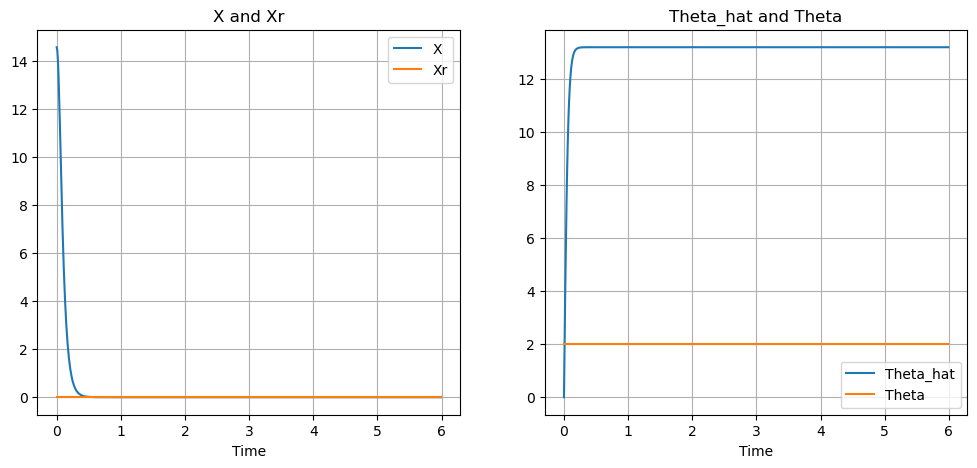

In [127]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(t,x)
plt.plot(t, [x_r]*len(t))
plt.title("X and Xr")
plt.xlabel("Time")
plt.legend(["X","Xr"])
plt.grid()

plt.subplot(1,2,2)
plt.plot(t,theta_hat)
plt.plot(t, [sys.theta]*len(t))
plt.title("Theta_hat and Theta")
plt.xlabel("Time")
plt.legend(["Theta_hat","Theta"])
plt.grid()
plt.show()

A persistant estimation error will be observed eventhough tracking is achieved